<a href="https://colab.research.google.com/github/https-deeplearning-ai/tensorflow-1-public/blob/master/C3/W3/ungraded_labs/C3_W3_Lab_6_sarcasm_with_1D_convolutional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ungraded Lab: Training a Sarcasm Detection Model using a Convolution Layer

You will be doing the same steps here as the previous lab but will be using a convolution layer instead. As usual, try tweaking the parameters and observe how it affects the results. 


## Download the Dataset

In [1]:
# Download the dataset
!gdown --id 1xRU3xY5-tkiPGvlz5xBJ18_pHWSRzI4v

C:\Users\devas\AppData\Local\pypoetry\Cache\virtualenvs\tensorflow-1-public-cSeBuBzT-py3.7\lib\site-packages\gdown\cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1xRU3xY5-tkiPGvlz5xBJ18_pHWSRzI4v
To: D:\Source\Sandoxes\tensorflow-1-public\C3\W3\ungraded_labs\sarcasm.json

  0%|          | 0.00/5.64M [00:00<?, ?B/s]
  9%|9         | 524k/5.64M [00:00<00:01, 4.10MB/s]
 19%|#8        | 1.05M/5.64M [00:00<00:01, 3.72MB/s]
 37%|###7      | 2.10M/5.64M [00:00<00:00, 4.62MB/s]
 56%|#####5    | 3.15M/5.64M [00:00<00:00, 4.93MB/s]
 74%|#######4  | 4.19M/5.64M [00:00<00:00, 5.55MB/s]
 93%|#########2| 5.24M/5.64M [00:00<00:00, 5.97MB/s]
100%|##########| 5.64M/5.64M [00:00<00:00, 5.76MB/s]


In [2]:
import json

# Load the JSON file
with open("./sarcasm.json", 'r') as f:
    datastore = json.load(f)

# Initialize the lists
sentences = []
labels = []

# Collect sentences and labels into the lists
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

## Split the Dataset

In [3]:
training_size = 20000

# Split the sentences
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

# Split the labels
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

## Data preprocessing

In [4]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Generate the word index dictionary
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

# Generate and pad the training sequences
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Generate and pad the testing sequences
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Convert the labels lists into numpy arrays
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

## Build and Compile the Model

In [5]:
import tensorflow as tf

# Parameters
embedding_dim = 16
filters = 128
kernel_size = 5
dense_dim = 6

# Model Definition with Conv1D
model_conv = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(filters, kernel_size, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Set the training parameters
model_conv.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model_conv.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           160000    
                                                                 
 conv1d (Conv1D)             (None, 116, 128)          10368     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 6)                 774       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 171,149
Trainable params: 171,149
Non-trainable params: 0
__________________________________________________

## Train the Model

In [6]:
NUM_EPOCHS = 10

# Train the model
history_conv = model_conv.fit(training_padded, training_labels, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels))

Epoch 1/10
625/625 [==============================] - 11s 6ms/step - loss: 0.4618 - accuracy: 0.7609 - val_loss: 0.3649 - val_accuracy: 0.8426
Epoch 2/10
625/625 [==============================] - 3s 5ms/step - loss: 0.2427 - accuracy: 0.9010 - val_loss: 0.3666 - val_accuracy: 0.8445
Epoch 3/10
625/625 [==============================] - 3s 5ms/step - loss: 0.1391 - accuracy: 0.9503 - val_loss: 0.4343 - val_accuracy: 0.8398
Epoch 4/10
625/625 [==============================] - 4s 6ms/step - loss: 0.0658 - accuracy: 0.9798 - val_loss: 0.5423 - val_accuracy: 0.8369
Epoch 5/10
625/625 [==============================] - 6s 9ms/step - loss: 0.0281 - accuracy: 0.9930 - val_loss: 0.6866 - val_accuracy: 0.8346
Epoch 6/10
625/625 [==============================] - 5s 7ms/step - loss: 0.0111 - accuracy: 0.9974 - val_loss: 0.8002 - val_accuracy: 0.8348
Epoch 7/10
625/625 [==============================] - 5s 7ms/step - loss: 0.0047 - accuracy: 0.9987 - val_loss: 0.8622 - val_accuracy: 0.8346
Epoch

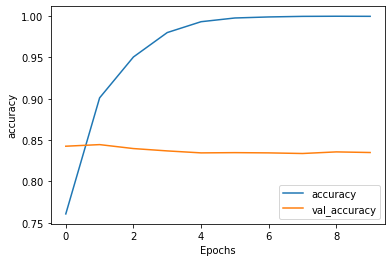

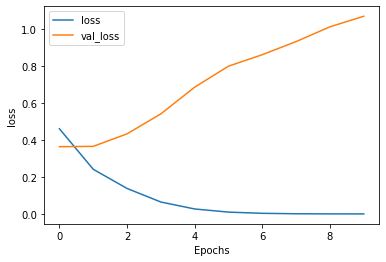

In [7]:
import matplotlib.pyplot as plt

# Plot Utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and loss history
plot_graphs(history_conv, 'accuracy')
plot_graphs(history_conv, 'loss')